In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,movie,rating (1-5)
0,Kristian,The Big Lebowksi,3.0
1,Max,The Empire strikes back,5.0
2,Max,The Big Lebowksi,5.0
3,Kristian,Memento,4.0
4,Sara,Green Mile,5.0


In [13]:
df.tail()

,name,movie,rating (1-5)
82,Carina,Ice Age,3.0
83,NaN,NaN,NaN
84,NaN,NaN,NaN
85,Felix,Django Unchained,4.0
86,Felix,Memento,5.0


In [14]:
df = df.dropna()

In [46]:
df.describe()

,rating (1-5)
count,85.000000
mean,3.788235
std,1.319218
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df.shape

(87, 3)

In [12]:
df.groupby('name')['rating (1-5)'].count()

name
Anastasia     8
Basti         6
Braulio       8
Carina        7
Felix         9
Kristian      7
Kriszta       4
Lara         12
Max           9
Rafael        5
Robin         5
Sara          5
Name: rating (1-5), dtype: int64

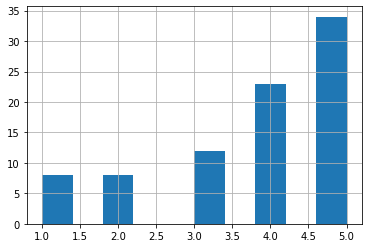

In [20]:
df['rating (1-5)'].hist()

In [16]:
n = list(df['movie'].unique())

In [19]:
n.sort()
n

['A Million ways to die in the west',
 'American Beauty',
 'Blade Runner ',
 'Blade Runner 2049',
 'Blues Brothers',
 'Butterfly Effect',
 'Cats',
 'Diva',
 'Django Unchained',
 "Dude, where's my car?",
 'Dune',
 'Eurovision Song Contest: The Story Of Fire Saga',
 'Ex machina',
 'Fantastic Beasts and where to find them, part 2',
 'Fight Club',
 'Gattaca',
 'Gemini Man',
 'Green Mile',
 'Harry Potter and the deathly hallows ',
 "Harry Potter and the philosopher's Stone",
 'Hidden Figures',
 'High School Musical',
 'High School Musical 2',
 'Ice Age',
 'Inside Out',
 'Interstellar',
 'JoJo Rabbit',
 'Lord of the Rings - The Fellowship of the Ring',
 'Lord of the Rings -- The Fellowship of the Ring',
 'Lord of the Rings -- The Return of the King',
 'Lord of the Rings -- The Two Towers',
 'Matrix',
 'Memento',
 'Moana',
 'Parasite',
 'Psycho',
 'Pulp Fiction',
 'Red Joan',
 "Romy and Michelle's High School Reunion",
 'Se7en',
 'Sharknado',
 'Shawshank Redemption',
 'Shoplifters',
 'Shutter

In [23]:
df.groupby('movie')['rating (1-5)'].mean().sort_values(ascending = False).head(10)

movie
JoJo Rabbit                                 5.0
Psycho                                      5.0
Shawshank Redemption                        5.0
Shoplifters                                 5.0
Interstellar                                5.0
Harry Potter and the philosopher's Stone    5.0
Green Mile                                  5.0
Gattaca                                     5.0
Red Joan                                    5.0
Se7en                                       5.0
Name: rating (1-5), dtype: float64

### Baseline recommender with a groupby

In [30]:
s = df.groupby('movie')['rating (1-5)'].agg(['mean','count'])
s.sort_values(by=['mean','count'], ascending = [False,False]).head(10)

,mean,count
movie,,
Green Mile,5.0,2
Interstellar,5.0,2
Lord of the Rings -- The Fellowship of the Ring,5.0,2
Blade Runner,5.0,1
Gattaca,5.0,1
Harry Potter and the philosopher's Stone,5.0,1
Inside Out,5.0,1
JoJo Rabbit,5.0,1
Matrix,5.0,1


**Also see:**

Ranking Formula that balances mean rating vs count

(still not personalized)

### Interpret the data as a (name x movie) matrix

In [31]:
df.head()

,name,movie,rating (1-5)
0,Kristian,The Big Lebowksi,3.0
1,Max,The Empire strikes back,5.0
2,Max,The Big Lebowksi,5.0
3,Kristian,Memento,4.0
4,Sara,Green Mile,5.0


In [34]:
df.pivot(index = 'movie', columns = 'name', values = 'rating (1-5)')

name,Anastasia,Basti,Braulio,Carina,Felix,Kristian,Kriszta,Lara,Max,Rafael,Robin,Sara
movie,,,,,,,,,,,,
A Million ways to die in the west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
American Beauty,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
Blade Runner,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blade Runner 2049,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blues Brothers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
The Seventh Seal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
The Sixth Sense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
The Theory of Everything,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [39]:
mm = df.set_index(['name','movie'])['rating (1-5)'].unstack(0)
mm.head()

name,Anastasia,Basti,Braulio,Carina,Felix,Kristian,Kriszta,Lara,Max,Rafael,Robin,Sara
movie,,,,,,,,,,,,
A Million ways to die in the west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
American Beauty,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
Blade Runner,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blade Runner 2049,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blues Brothers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [42]:
# matrix has 52 x 12 cells ~ 600
mm.shape

(62, 12)

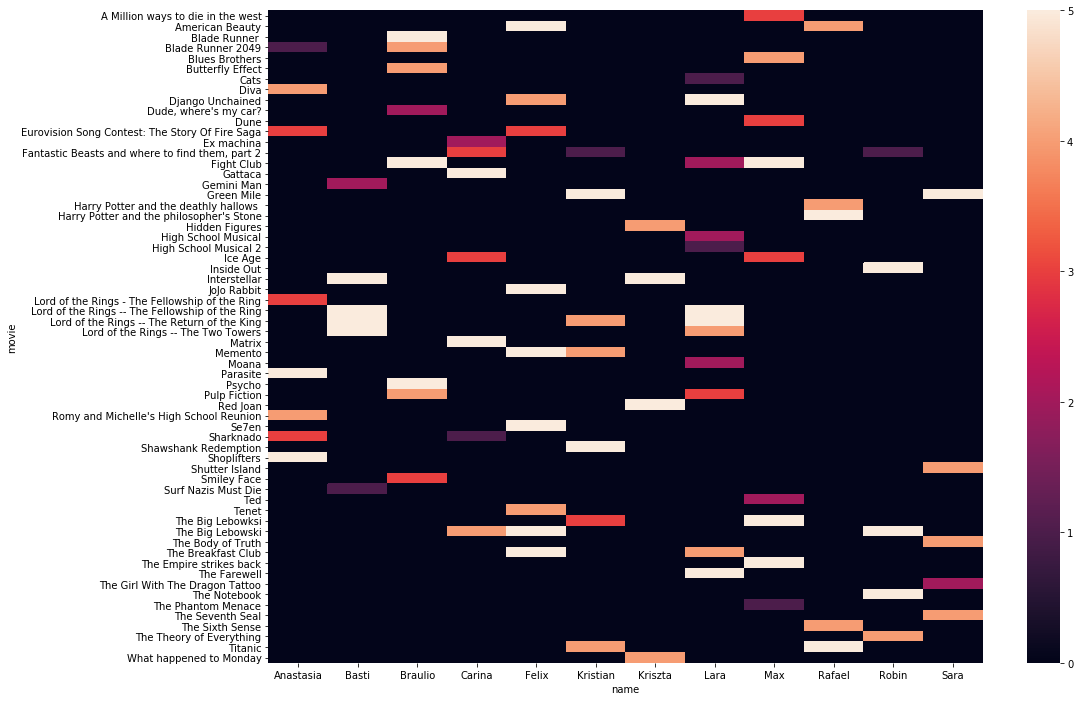

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(mm.fillna(0.0))